In [1]:
!pip install plotly
!pip install chart_studio

In [2]:
import pandas as pd
import numpy as np
import statistics as stats
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import iplot
import chart_studio.plotly as cpy

In [3]:
import chart_studio
chart_studio.tools.set_credentials_file(username='psouza.neto', api_key='tLKsamCdY0STl179pssI')

In [4]:
df=pd.read_excel('C:/Users/Pedro Fernandes/Desktop/Github/Traveling-Costs-Issue/Exploring_analysis/Custos_passagem_diárias(corrigido).xlsx')
df.head()

,Orgao_Solicitante,Nome_viajante,Numero_PCDP,Data_Solicitacao,Data_Inicio,Vr_Diaria,Vr_Passagem,Vr_Viagem
0,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000631/17,2017-03-24,2017-03-29,283.11,0.0,283.11
1,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000632/17,2017-03-24,2017-04-01,360.50,0.0,360.50
2,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000664/17,2017-03-29,2017-04-07,389.37,0.0,389.37
3,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000830/17,2017-04-20,2017-04-26,274.11,0.0,274.11
4,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000868/17,2017-05-03,2017-05-09,394.98,0.0,394.98


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6442 entries, 0 to 6441
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Orgao_Solicitante  6442 non-null   object        
 1   Nome_viajante      6442 non-null   object        
 2   Numero_PCDP        6442 non-null   object        
 3   Data_Solicitacao   6442 non-null   datetime64[ns]
 4   Data_Inicio        6442 non-null   datetime64[ns]
 5   Vr_Diaria          6442 non-null   float64       
 6   Vr_Passagem        6442 non-null   float64       
 7   Vr_Viagem          6442 non-null   float64       
dtypes: datetime64[ns](2), float64(3), object(3)
memory usage: 402.8+ KB


In [6]:
# Estabelecendo as taxas de crescimento e decrescimento entre as médias dos 3 anos
# Grafico e Taxas
df['Ano']=df.Data_Solicitacao.dt.year
df.head()

,Orgao_Solicitante,Nome_viajante,Numero_PCDP,Data_Solicitacao,Data_Inicio,Vr_Diaria,Vr_Passagem,Vr_Viagem,Ano
0,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000631/17,2017-03-24,2017-03-29,283.11,0.0,283.11,2017
1,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000632/17,2017-03-24,2017-04-01,360.50,0.0,360.50,2017
2,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000664/17,2017-03-29,2017-04-07,389.37,0.0,389.37,2017
3,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000830/17,2017-04-20,2017-04-26,274.11,0.0,274.11,2017
4,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000868/17,2017-05-03,2017-05-09,394.98,0.0,394.98,2017


In [7]:
# Média de gastos por ano
df.groupby('Ano').mean()

,Vr_Diaria,Vr_Passagem,Vr_Viagem
Ano,,,
2017,208.738641,100.239123,308.977764
2018,242.193141,155.845772,398.038913
2019,188.959953,132.174036,321.133989


In [8]:
# Gastos absolutos por ano
df.groupby('Ano').sum()

,Vr_Diaria,Vr_Passagem,Vr_Viagem
Ano,,,
2017,290355.45,139432.62,429788.07
2018,650772.97,418757.59,1069530.56
2019,446701.33,312459.42,759160.75


In [9]:
# Gastos TOTAL em cada ano
df.groupby('Ano').sum().sum()

Vr_Diaria      1387829.75
Vr_Passagem     870649.63
Vr_Viagem      2258479.38
dtype: float64

In [10]:
# Medidas de tendência central e quais informações suas relações podem fornecer ao estudo?
# 2017, 2018, 2019 e TOTAL
# boxplot
df.head()

,Orgao_Solicitante,Nome_viajante,Numero_PCDP,Data_Solicitacao,Data_Inicio,Vr_Diaria,Vr_Passagem,Vr_Viagem,Ano
0,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000631/17,2017-03-24,2017-03-29,283.11,0.0,283.11,2017
1,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000632/17,2017-03-24,2017-04-01,360.50,0.0,360.50,2017
2,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000664/17,2017-03-29,2017-04-07,389.37,0.0,389.37,2017
3,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000830/17,2017-04-20,2017-04-26,274.11,0.0,274.11,2017
4,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000868/17,2017-05-03,2017-05-09,394.98,0.0,394.98,2017


In [11]:
df.columns

Index(['Orgao_Solicitante', 'Nome_viajante', 'Numero_PCDP', 'Data_Solicitacao',
       'Data_Inicio', 'Vr_Diaria', 'Vr_Passagem', 'Vr_Viagem', 'Ano'],
      dtype='object')

In [12]:
df.Ano=df.Ano.astype(str)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6442 entries, 0 to 6441
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Orgao_Solicitante  6442 non-null   object        
 1   Nome_viajante      6442 non-null   object        
 2   Numero_PCDP        6442 non-null   object        
 3   Data_Solicitacao   6442 non-null   datetime64[ns]
 4   Data_Inicio        6442 non-null   datetime64[ns]
 5   Vr_Diaria          6442 non-null   float64       
 6   Vr_Passagem        6442 non-null   float64       
 7   Vr_Viagem          6442 non-null   float64       
 8   Ano                6442 non-null   object        
dtypes: datetime64[ns](2), float64(3), object(4)
memory usage: 453.1+ KB


In [14]:
df.head()

,Orgao_Solicitante,Nome_viajante,Numero_PCDP,Data_Solicitacao,Data_Inicio,Vr_Diaria,Vr_Passagem,Vr_Viagem,Ano
0,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000631/17,2017-03-24,2017-03-29,283.11,0.0,283.11,2017
1,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000632/17,2017-03-24,2017-04-01,360.50,0.0,360.50,2017
2,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000664/17,2017-03-29,2017-04-07,389.37,0.0,389.37,2017
3,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000830/17,2017-04-20,2017-04-26,274.11,0.0,274.11,2017
4,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000868/17,2017-05-03,2017-05-09,394.98,0.0,394.98,2017


In [15]:
df_melt=df.melt(id_vars=['Orgao_Solicitante', 'Nome_viajante', 'Numero_PCDP', 'Data_Solicitacao',
       'Data_Inicio', 'Ano'])
df_melt

,Orgao_Solicitante,Nome_viajante,Numero_PCDP,Data_Solicitacao,Data_Inicio,Ano,variable,value
0,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000631/17,2017-03-24,2017-03-29,2017,Vr_Diaria,283.11
1,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000632/17,2017-03-24,2017-04-01,2017,Vr_Diaria,360.50
2,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000664/17,2017-03-29,2017-04-07,2017,Vr_Diaria,389.37
3,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000830/17,2017-04-20,2017-04-26,2017,Vr_Diaria,274.11
4,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000868/17,2017-05-03,2017-05-09,2017,Vr_Diaria,394.98
...,...,...,...,...,...,...,...,...
19321,INSTITUTO DE CIÊNCIAS EXATAS E BIOLÓGICAS,PUCA HUACHI VAZ PENNA,001519/19,2019-08-27,2019-09-03,2019,Vr_Viagem,0.00
19322,INSTITUTO DE CIÊNCIAS EXATAS E BIOLÓGICAS,PUCA HUACHI VAZ PENNA,002018/19,2019-10-21,2019-10-21,2019,Vr_Viagem,0.00
19323,INSTITUTO DE CIÊNCIAS EXATAS E BIOLÓGICAS,ROBERTA BARBOSA OLIVEIRA,001610/19,2019-09-05,2019-09-08,2019,Vr_Viagem,0.00
19324,INSTITUTO DE CIÊNCIAS EXATAS E BIOLÓGICAS,ANDREA GOMES CAMPOS BIANCHI,001921/19,2019-10-10,2019-10-31,2019,Vr_Viagem,0.00


In [16]:
df.groupby('Ano').sum()

,Vr_Diaria,Vr_Passagem,Vr_Viagem
Ano,,,
2017,290355.45,139432.62,429788.07
2018,650772.97,418757.59,1069530.56
2019,446701.33,312459.42,759160.75


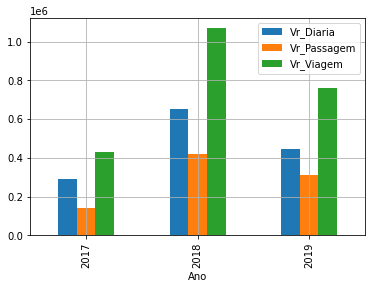

In [17]:
# Boxplot para responder questões:
# Considerar apenas valores diferentes de zero
# 1, 2 e 3
df.groupby('Ano').sum().plot(kind='bar',grid=True)

In [18]:
# Isolando dados com valores diferente de zero
df_melt.head()

,Orgao_Solicitante,Nome_viajante,Numero_PCDP,Data_Solicitacao,Data_Inicio,Ano,variable,value
0,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000631/17,2017-03-24,2017-03-29,2017,Vr_Diaria,283.11
1,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000632/17,2017-03-24,2017-04-01,2017,Vr_Diaria,360.50
2,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000664/17,2017-03-29,2017-04-07,2017,Vr_Diaria,389.37
3,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000830/17,2017-04-20,2017-04-26,2017,Vr_Diaria,274.11
4,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000868/17,2017-05-03,2017-05-09,2017,Vr_Diaria,394.98


In [19]:
# Dados preparados para o boxplot
# Valores iguais a zero eliminados pois, a análise do boxplot deve ser de modelos 
df_melt=df_melt[df_melt.value!=0]
df_melt.columns=['Orgao_Solicitante','Nome_viajante','Numero_PCDP','Data_Solicitacao','Data_Inicio','Ano','Despesa','Valor']
df_melt

,Orgao_Solicitante,Nome_viajante,Numero_PCDP,Data_Solicitacao,Data_Inicio,Ano,Despesa,Valor
0,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000631/17,2017-03-24,2017-03-29,2017,Vr_Diaria,283.11
1,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000632/17,2017-03-24,2017-04-01,2017,Vr_Diaria,360.50
2,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000664/17,2017-03-29,2017-04-07,2017,Vr_Diaria,389.37
3,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000830/17,2017-04-20,2017-04-26,2017,Vr_Diaria,274.11
4,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000868/17,2017-05-03,2017-05-09,2017,Vr_Diaria,394.98
...,...,...,...,...,...,...,...,...
19302,"ESCOLA DE DIREITO, TURISMO E MUSEOLOGIA",MARCELO VIANA RAMOS,002336/19,2019-11-12,2019-11-14,2019,Vr_Viagem,32.13
19303,REITORIA,ABELARD RAMOS FERNANDES,002021/19,2019-10-21,2019-10-23,2019,Vr_Viagem,22.07
19304,INSTITUTO DE CIÊNCIAS HUMANAS E SOCIAIS,MARCELO LOURES DOS SANTOS,002011/19,2019-10-21,2019-10-25,2019,Vr_Viagem,21.91
19305,REITORIA,NISIELLY TICIANY SILVA,002146/19,2019-10-31,2019-11-04,2019,Vr_Viagem,18.27


In [20]:
# Grafico de linhas: Taxa de crescimento/decrescimento

In [21]:
df.groupby('Ano').sum()

,Vr_Diaria,Vr_Passagem,Vr_Viagem
Ano,,,
2017,290355.45,139432.62,429788.07
2018,650772.97,418757.59,1069530.56
2019,446701.33,312459.42,759160.75


In [22]:
df.groupby('Ano').sum().index

Index(['2017', '2018', '2019'], dtype='object', name='Ano')

In [82]:
linDiaria=go.Scatter(x=df.groupby('Ano').sum().index , y=df.groupby('Ano').sum().iloc[:,0], name='Diárias')
linPassagem=go.Scatter(x=df.groupby('Ano').sum().index , y=df.groupby('Ano').sum().iloc[:,1], name='Passagens')
linViagem=go.Scatter(x=df.groupby('Ano').sum().index , y=df.groupby('Ano').sum().iloc[:,2],
                     name='Viagem (Diária + Passagem)')

In [83]:
linMain=go.Figure(data=[linDiaria, linPassagem, linViagem],
                 layout=go.Layout(title='Taxa Crescimento/Decrescimento'))
cpy.iplot(linMain)

In [25]:
df.groupby('Ano').sum()

,Vr_Diaria,Vr_Passagem,Vr_Viagem
Ano,,,
2017,290355.45,139432.62,429788.07
2018,650772.97,418757.59,1069530.56
2019,446701.33,312459.42,759160.75


In [26]:
dfTax=df.groupby('Ano').sum()
dfTax['Taxa_Diaria']=np.NaN
dfTax['Taxa_Passagem']=np.NaN
dfTax['Taxa_Viagem']=np.NaN
dfTax

,Vr_Diaria,Vr_Passagem,Vr_Viagem,Taxa_Diaria,Taxa_Passagem,Taxa_Viagem
Ano,,,,,,
2017,290355.45,139432.62,429788.07,NaN,NaN,NaN
2018,650772.97,418757.59,1069530.56,NaN,NaN,NaN
2019,446701.33,312459.42,759160.75,NaN,NaN,NaN


In [27]:
# Calculando Taxa de Crescimento/Decrescimento
# Fazer para o valor de diária para testar depois generaliza em uma def
# Função realiza apenas o calculo, depois a função seria encluída 
#pos=0
#while pos < len(dfTax):
 #   if pos == 0:
  #      dfTax.Taxa_Diaria[0]=0       
  #  elif dfTax.Vr_Diaria[pos] > dfTax.Vr_Diaria[pos-1]:
   #     dfTax.Taxa_Diaria[pos]=(dfTax.Vr_Diaria[pos-1]/dfTax.Vr_Diaria[pos])*100
   # else:
    #    dfTax.Taxa_Diaria[pos]=((dfTax.Vr_Diaria[pos]/dfTax.Vr_Diaria[pos-1])*100)-100
    
   # if pos == 0:
    #    dfTax.Taxa_Passagem[0]=0
    #elif dfTax.Vr_Passagem[pos] > dfTax.Vr_Passagem[pos-1]:
     #   dfTax.Taxa_Passagem[pos]=(dfTax.Vr_Passagem[pos-1]/dfTax.Vr_Passagem[pos])*100
    #else:
     #   dfTax.Taxa_Passagem[pos]=((dfTax.Vr_Passagem[pos]/dfTax.Vr_Passagem[pos-1])*100)-100
        
    #if pos == 0:
   #     dfTax.Taxa_Viagem[0]=0
   # elif dfTax.Vr_Viagem[pos] > dfTax.Vr_Viagem[pos-1]:
    #    dfTax.Taxa_Viagem[pos]=(dfTax.Vr_Viagem[pos-1]/dfTax.Vr_Viagem[pos])*100
    #else:
     #   dfTax.Taxa_Viagem[pos]=((dfTax.Vr_Viagem[pos]/dfTax.Vr_Viagem[pos-1])*100)-100
    #pos+=1   

In [43]:
# Fazer função referente a celula anterior
# Calcula e preenche taxas de crescimento/decrescimento de uma coluna com base nos dados de outra coluna
# em uma mesma tabela
def fill_tax(table, colRef, colTax):   
    pos=0
    while pos < len(table):
        if pos == 0:
            colTax[0]=0       
        elif colRef[pos] > colRef[pos-1]:
            colTax[pos]=(colRef[pos-1]/colRef[pos])*100
        else:
            colTax[pos]=((colRef[pos]/colRef[pos-1])*100)-100
        pos+=1

In [44]:
fill_tax(table=dfTax, colRef=dfTax.Vr_Diaria, colTax=dfTax.Taxa_Diaria)
fill_tax(dfTax,dfTax.Vr_Passagem,dfTax.Taxa_Passagem)
fill_tax(dfTax,dfTax.Vr_Viagem,dfTax.Taxa_Viagem)

In [45]:
# taxas de crescimento/decrescimento
dfTax

,Vr_Diaria,Vr_Passagem,Vr_Viagem,Taxa_Diaria,Taxa_Passagem,Taxa_Viagem
Ano,,,,,,
2017,290355.45,139432.62,429788.07,0.000000,0.000000,0.000000
2018,650772.97,418757.59,1069530.56,44.617011,33.296739,40.184740
2019,446701.33,312459.42,759160.75,-31.358346,-25.384178,-29.019256


In [59]:
# Boxplot gastos totais
# Boxplot gastos totais: Posição, Dispersão, Simetria, Caudas e Outliers
figTot = px.box(data_frame=df_melt, x='Despesa', y='Valor')
figTot.update_traces(quartilemethod='exclusive')
cpy.iplot(figTot)

In [80]:
print('Total Diaria: ',df_melt.Valor[df_melt.Despesa=='Vr_Diaria'].sum())
print('Total Passagem: ',df_melt.Valor[df_melt.Despesa=='Vr_Passagem'].sum())
print('Total Viagem: ',df_melt.Valor[df_melt.Despesa=='Vr_Viagem'].sum())

Total Diaria:  1387829.75
Total Passagem:  870649.6299999999
Total Viagem:  2258479.38


In [77]:
print('Parâmetros para Valor Diária:')
print('Média:',stats.mean(df_melt.Valor[df_melt.Despesa=='Vr_Diaria']))
print('Mediana:',stats.median(df_melt.Valor[df_melt.Despesa=='Vr_Diaria']))
print('Moda:',stats.mode(df_melt.Valor[df_melt.Despesa=='Vr_Diaria']))
print('Desvio Padrão:',stats.stdev(df_melt.Valor[df_melt.Despesa=='Vr_Diaria']))
print()
print('Parâmetros para Valor Passagem:')
print('Média:',stats.mean(df_melt.Valor[df_melt.Despesa=='Vr_Passagem']))
print('Mediana:',stats.median(df_melt.Valor[df_melt.Despesa=='Vr_Passagem']))
print('Moda:',stats.mode(df_melt.Valor[df_melt.Despesa=='Vr_Passagem']))
print('Desvio Padrão:',stats.stdev(df_melt.Valor[df_melt.Despesa=='Vr_Passagem']))
print()
print('Parâmetros para Valor TOTAL da viagem:')
print('Média:',stats.mean(df_melt.Valor[df_melt.Despesa=='Vr_Viagem']))
print('Mediana:',stats.median(df_melt.Valor[df_melt.Despesa=='Vr_Viagem']))
print('Moda:',stats.mode(df_melt.Valor[df_melt.Despesa=='Vr_Viagem']))
print('Desvio Padrão:',stats.stdev(df_melt.Valor[df_melt.Despesa=='Vr_Viagem']))

Parâmetros para Valor Diária:
Média: 218.6247243226213
Mediana: 85.38
Moda: 85.38
Desvio Padrão: 361.01040140706874

Parâmetros para Valor Passagem:
Média: 1212.6039415041782
Mediana: 1073.0149999999999
Moda: 1523.42
Desvio Padrão: 881.9397655826406

Parâmetros para Valor TOTAL da viagem:
Média: 353.8826982137261
Mediana: 85.38
Moda: 85.38
Desvio Padrão: 725.8210208480646


In [93]:
df

,Orgao_Solicitante,Nome_viajante,Numero_PCDP,Data_Solicitacao,Data_Inicio,Vr_Diaria,Vr_Passagem,Vr_Viagem,Ano
0,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000631/17,2017-03-24,2017-03-29,283.11,0.0,283.11,2017
1,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000632/17,2017-03-24,2017-04-01,360.50,0.0,360.50,2017
2,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000664/17,2017-03-29,2017-04-07,389.37,0.0,389.37,2017
3,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000830/17,2017-04-20,2017-04-26,274.11,0.0,274.11,2017
4,CENTRO DE EDUCAÇÃO ABERTA E A DISTÂNCIA,ADRIANO SERGIO LOPES DA GAMA CERQUEIRA,000868/17,2017-05-03,2017-05-09,394.98,0.0,394.98,2017
...,...,...,...,...,...,...,...,...,...
6437,INSTITUTO DE CIÊNCIAS EXATAS E BIOLÓGICAS,PUCA HUACHI VAZ PENNA,001519/19,2019-08-27,2019-09-03,0.00,0.0,0.00,2019
6438,INSTITUTO DE CIÊNCIAS EXATAS E BIOLÓGICAS,PUCA HUACHI VAZ PENNA,002018/19,2019-10-21,2019-10-21,0.00,0.0,0.00,2019
6439,INSTITUTO DE CIÊNCIAS EXATAS E BIOLÓGICAS,ROBERTA BARBOSA OLIVEIRA,001610/19,2019-09-05,2019-09-08,0.00,0.0,0.00,2019
6440,INSTITUTO DE CIÊNCIAS EXATAS E BIOLÓGICAS,ANDREA GOMES CAMPOS BIANCHI,001921/19,2019-10-10,2019-10-31,0.00,0.0,0.00,2019
